(100, 100, 100)


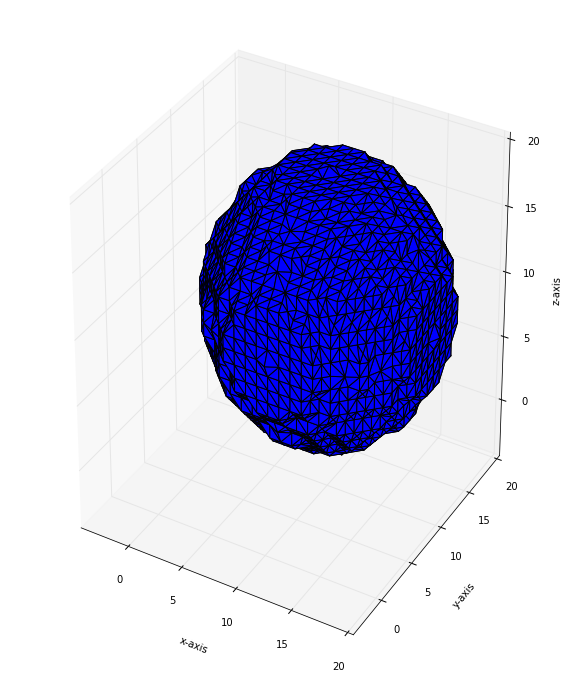

In [30]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sys
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

from skimage import measure
from skimage.draw import ellipsoid

c = [10,10,10]
r=10
ellip_base = np.zeros((100,100,100))
for i in range(ellip_base.shape[0]):
    for j in range(ellip_base.shape[1]):
        for k in range(ellip_base.shape[2]):
            if (i-c[0])**2 + (j-c[1])**2 + (k-c[2])**2 > r**2:
                ellip_base[i][j][k] = .1
            if (i-c[0])**2 + (j-c[1])**2 + (k-c[2])**2 < r**2:
                ellip_base[i][j][k] = -.1
            if (i-c[0])**2 + (j-c[1])**2 + (k-c[2])**2 == r**2:
                ellip_base[i][j][k] = 0

print ellip_base.shape

ellip_double = ellip_base

# Use marching cubes to obtain the surface mesh of these ellipsoids
verts, faces = measure.marching_cubes(ellip_double, 0)

# Display resulting triangular mesh using Matplotlib. This can also be done
# with mayavi (see skimage.measure.marching_cubes docstring).
fig = plt.figure(figsize=(10, 12))
ax = fig.add_subplot(111, projection='3d')

# Fancy indexing: `verts[faces]` to generate a collection of triangles
mesh = Poly3DCollection(verts[faces])
ax.add_collection3d(mesh)

ax.set_xlabel("x-axis")
ax.set_ylabel("y-axis")
ax.set_zlabel("z-axis")

ax.set_xlim(-4, 20)  
ax.set_ylim(-4, 20)  
ax.set_zlim(-4, 20)  

plt.show()
